In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.shape

(506, 13)

In [ ]:
X=load_boston().data
Y=load_boston().target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (404, 13)
X_Test Shape:  (102, 13)
Y_Train Shape:  (404,)
Y_Test Shape:  (102,)


In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.409662,-0.477978,-0.869715,-0.288288,-0.345536,-0.563820,-0.334621,0.873831,-0.524106,-1.098495,0.801071,0.417096,-0.295608,18.5
1,-0.402644,-0.477978,0.251745,-0.288288,-1.019762,0.011260,-0.856497,0.342613,-0.524106,-0.065344,0.096296,0.288665,-0.526252,21.4
2,-0.407210,-0.477978,-1.130998,-0.288288,-0.570278,1.177599,-0.209514,-0.177001,-0.866541,-0.825363,-0.326569,0.430959,-0.987542,28.7
3,-0.409039,2.906825,-0.904944,-0.288288,-1.244504,0.517213,-1.628586,0.635872,-0.638251,-0.973804,0.331221,0.440276,-1.129915,27.9
4,-0.405815,-0.477978,-1.270446,-0.288288,-0.578922,2.186563,0.512532,-0.498626,-0.752396,-1.282562,-0.326569,0.425414,-0.722727,39.8


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

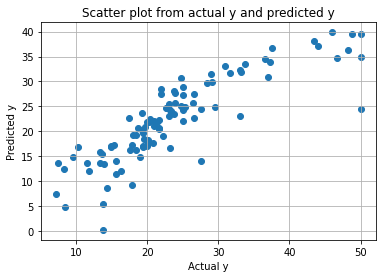

In [ ]:
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [ ]:
y_pred_sksgd

array([23.12459981, 22.64585138, 22.06633485, 20.83832815, 13.43820265,
        9.12267286, 33.97434853, 21.87433847, 13.51187897, 39.5925348 ,
       29.68738275, 23.66445083, 16.60304221, 25.64618931, 17.27770161,
       28.48506287, 33.10069882, 34.93798644, 12.05223701, 24.90302841,
        5.39373345, 34.64448402, 24.17275786, 24.8612245 , 12.01212758,
       17.60345673, 17.0336272 , 33.49624749, 25.56363816, 15.74294227,
       18.23153055, 31.89151728, 19.20910728, 13.55607651, 19.71093237,
       38.20413755, 23.0407104 , 31.43970705, 27.23802955, 16.15071128,
       25.4722801 , 28.79847239, 13.96191376, 23.6499619 , 24.76704293,
       22.53825866, 25.06396015, 21.82583794, 17.01173282, 21.94501631,
       13.92954986, 17.54293998, 20.43187146, 28.07380107, 15.38746844,
       24.44379343,  0.17094672, 12.49945984, 27.38454102, 18.47105274,
       14.74084678, 17.24382157, 24.63472266, 23.37768685, 20.62693786,
       22.04795454, 39.61862686, 11.45279616, 13.53917534, 36.29

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

Mean Squared Error : 27.677558225281576


In [ ]:
def MyCustomSGD(train_data,learning_rate,n_iter,k,divideby):

 # Initially we will keep our W and B as 0 as per the Training Data
 w=np.zeros(shape=(1,train_data.shape[1]-1))
 b=0

 cur_iter=1
 while(cur_iter<=n_iter):
 # We will create a small training data set of size K
  temp=train_data.sample(k)

 # We create our X and Y from the above temp dataset
  y=np.array(temp['price'])
  x=np.array(temp.drop('price',axis=1))

 # We keep our initial gradients as 0
  w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
  b_gradient=0

  for i in range(k): # Calculating gradients for point in our K sized dataset
    prediction=np.dot(w,x[i])+b
    w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
    b_gradient=b_gradient+(-2)*(y[i]-(prediction))

 #Updating the weights(W) and Bias(b) with the above calculated Gradients
    w=w-learning_rate*(w_gradient/k)
    b=b-learning_rate*(b_gradient/k)

 # Incrementing the iteration value
    cur_iter=cur_iter+1

 #Dividing the learning rate by the specified value
    learning_rate=learning_rate/divideby

  return w,b #Returning the weights and Bias

In [ ]:
def predict(x,w,b):
 y_pred=[]
 for i in range(len(x)):
  y=np.asscalar(np.dot(w,x[i])+b)
  y_pred.append(y)
 return np.array(y_pred)

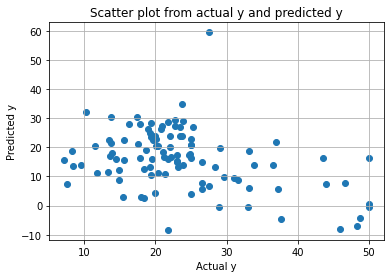

Mean Squared Error : 343.61956294930644


In [ ]:
w,b=MyCustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(x_test,w,b)
plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))